<a href="https://colab.research.google.com/github/engineerjkk/DeepLearning_from_Scratch/blob/main/Final_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Layer Explaination

In [15]:
import tensorflow as tf

## Input Image  
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 로드  
- os
- glob
- matplotlib

In [16]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [18]:
image = train_x[0]

In [19]:
# 이미지 shape 확인
image.shape

(28, 28)

* 차원 수를 확인 
* MNIST의 데이터는 [batch size,height,width,channel]=[60000,28,28,1] 이었습니다.

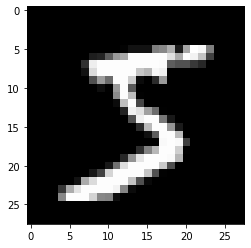

In [20]:
plt.imshow(image,'gray')
plt.show()

In [21]:
# 차원 수 높이기 
image = image[tf.newaxis, ..., tf.newaxis]

In [22]:
image.shape

(1, 28, 28, 1)

# Feature Extraction

## Convolution

filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)  
kernel_size: filter(Weight)의 사이즈  
strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)  
padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (사이즈에도 영향을 줌)  
activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

# 일부러 제로패딩을 주고 밑에 padding='VALID'로 하자
- tf.keras.layers.Conv2D 내부구조를 분석하면 할 수 있을 듯??

In [23]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='VALID', activation='relu')

(3, 3) 대신에 3으로도 대체 가능

In [24]:
tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=(1, 1), padding='VALID', activation='relu')

### Visualization

- tf.keras.layers.Conv2D
- integer의 경우 모델에 들어가면 에러가나므로 float32로 변경해준다.

In [25]:
image = tf.cast(image, dtype=tf.float32)

In [26]:
layer = tf.keras.layers.Conv2D(5, 3, strides=(1, 1), padding='SAME')
output = layer(image)

In [27]:
output

<tf.Tensor: shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0

In [28]:
import numpy as np
np.min(image),np.max(image)

(0.0, 255.0)

In [29]:
np.min(output),np.max(output)

(-298.76895, 234.79303)

In [30]:
output.shape

TensorShape([1, 28, 28, 5])

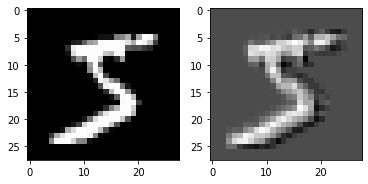

In [31]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0],'gray')
plt.show()

weight 불러오기

- layer.get_weights()

앞에는 weight, 뒤에는 bias이다.

In [32]:
weight=layer.get_weights()
len(weight)

2

In [33]:
weight[0].shape,weight[1].shape

((3, 3, 1, 5), (5,))

# 필터 시각화하기

In [34]:
weight[0].shape

(3, 3, 1, 5)

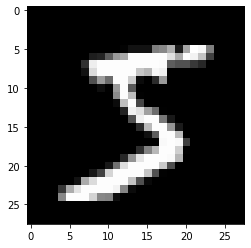

In [35]:
plt.imshow(image[0,:,:,0],'gray')
plt.show()

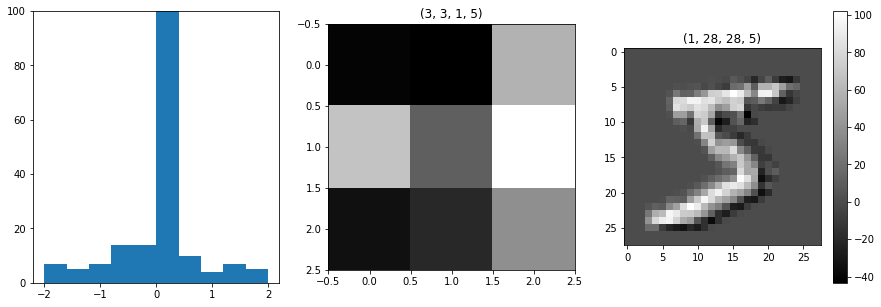

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

## Activation Function

In [37]:
tf.keras.layers.ReLU()

In [38]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [39]:
output.shape

TensorShape([1, 28, 28, 5])

In [40]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [41]:
np.min(output), np.max(output)

(-298.76895, 234.79303)

In [42]:
np.min(act_output), np.max(act_output)

(0.0, 234.79303)

activation을 ReLU를 썼기 때문에 텐서를 받으면 0 미만값은 다 죽여버린다.

# 따라서 각 필터연산된 feature map을 모두 연산한 뒤에 다음레이어에 들어갈때 그 matrix에 activation function을 각 픽셀마다 곱해 연산해주는 것이다.
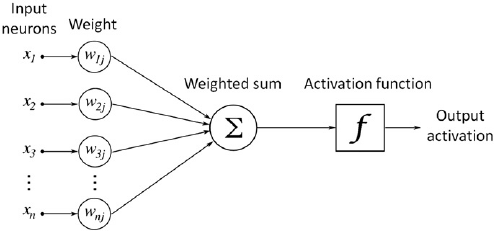

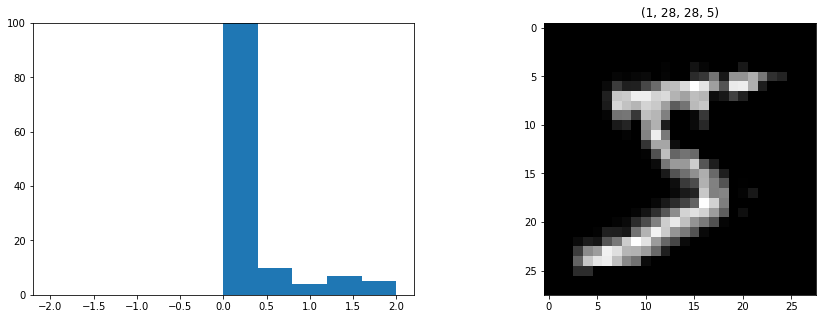

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.show()

In [44]:
# out = tf.keras.layers.Conv2D(3, 3, strides=(1, 1), padding='SAME')(out)
layer = tf.keras.layers.ReLU()
output = layer(output)

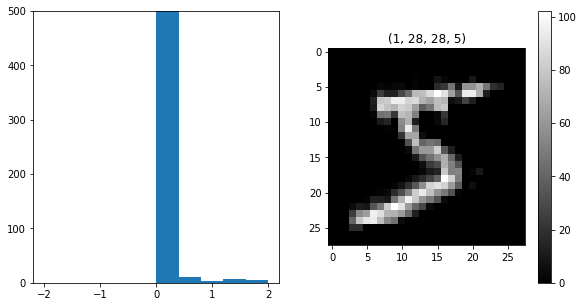

In [45]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## Pooling

![image.png](attachment:image.png)

- tf.keras.layers.MaxPool2D

In [46]:
tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [47]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output = layer(output)

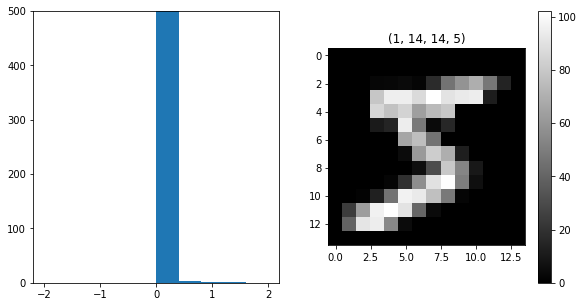

In [48]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# 여기에 테이블 구조 CONVOLUTION 넣기!!!

In [49]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output = layer(output)

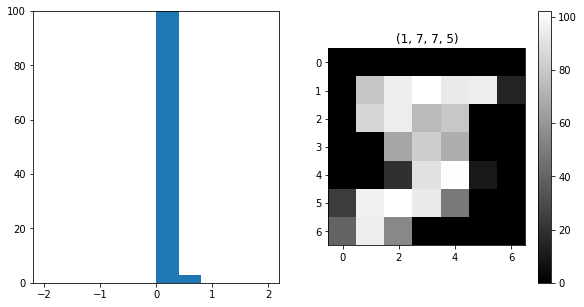

In [50]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# Fully Connected

![image.png](attachment:image.png)

## Flatten

![image.png](attachment:image.png)

- tf.keras.layers.Flatten()

In [51]:
tf.keras.layers.Flatten()

In [52]:
layer = tf.keras.layers.Flatten()
output = layer(output)

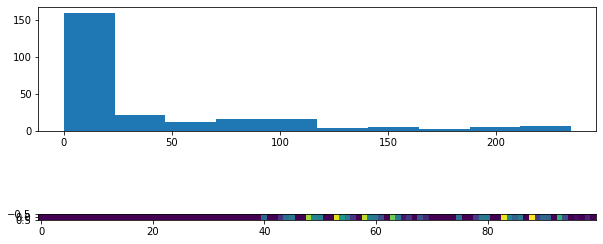

In [53]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show()

# 지금까지 input에 넣기 위해 펼치기만 했을 뿐

## Dense

- tf.keras.layers.Dense

# 내보낼 유닛 개수를 32개로 설정하고 이 32개와 모두 연결한다는 뜻이된다.

In [54]:
tf.keras.layers.Dense(32, activation='relu')

In [55]:
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(output)

In [57]:
layer = tf.keras.layers.Dense(10, activation='relu')
output = layer(output)

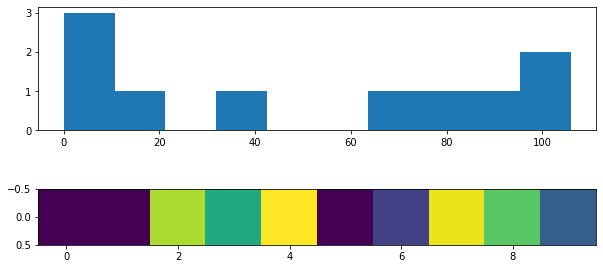

In [58]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show()

## DropOut

![image.png](attachment:image.png)

- tf.keras.layers.Dropout

In [59]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [61]:
output.shape

TensorShape([1, 10])

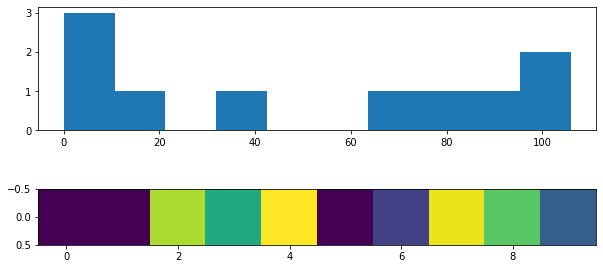

In [60]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show()

# Build Model

![image.png](attachment:image.png)

In [62]:
from tensorflow.keras import layers

In [63]:
input_shape = (28, 28, 1)
num_classes = 10

In [65]:
inputs = layers.Input(input_shape)
#32는 필터개수 
#feature extraction이며, 여기서는 전부 연결헀고 끝에 Dropout을 설정해줬다.
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='CVandAR')

## Summary

In [66]:
model.summary()

Model: "CVandAR"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0   